# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import your libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, normaltest, poisson



# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
# Your code here
a = norm.rvs(size=10,loc=50,scale=5)
print('a--> ', normaltest(a))
b = norm.rvs(size=50,loc=50,scale=5)
print('b--> ', normaltest(b))
c = norm.rvs(size=500,loc=50,scale=5)
print('c--> ', normaltest(c))
d = norm.rvs(size=5000,loc=50,scale=5)
print('d--> ', normaltest(d))
x = np.concatenate((a,b,c,d))
normaltest(x)

a-->  NormaltestResult(statistic=0.07612590684701548, pvalue=0.9626523367233552)
b-->  NormaltestResult(statistic=1.164331794363676, pvalue=0.5586869965960994)
c-->  NormaltestResult(statistic=0.24084759708296094, pvalue=0.8865446407661801)
d-->  NormaltestResult(statistic=0.6923213737876132, pvalue=0.7073988082562145)


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=0.6684496184178407, pvalue=0.7158928248359114)

#### Interpret the normaltest results and make your observations.

In [3]:
#como todas las pvalue son mayores que alpha=0.05 se considera que nuestras distribuciones son normales

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

(array([   2.,   33.,  142.,  562., 1154., 1411., 1075.,  460.,  148.,
          13.]),
 array([30.18562517, 33.83219692, 37.47876867, 41.12534042, 44.77191217,
        48.41848392, 52.06505567, 55.71162742, 59.35819916, 63.00477091,
        66.65134266]),
 <a list of 10 Patch objects>)

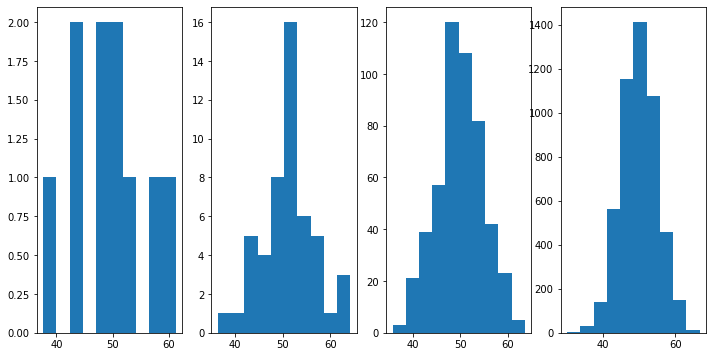

In [4]:
plt.figure(figsize=(12,6))

plt.subplot(1,4,1)
plt.hist(a)
plt.subplot(1,4,2)
plt.hist(b)
plt.subplot(1,4,3)
plt.hist(c)
plt.subplot(1,4,4)
plt.hist(d)


#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [5]:
# Your comment and explanation here
#se ve que cuantas más muestras tomamos más se aprecia la distribucion normal en forma de campana 

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

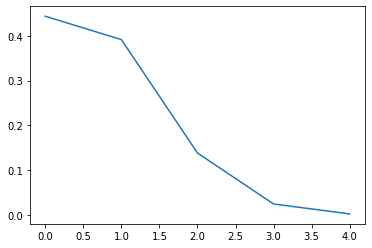

In [6]:
from scipy.stats import binom
data_binom = binom.pmf(k=range(5),n=5,p=0.15)

plt.plot(data_binom)

#### Explain what you observe from the plot above

In [7]:
# Your comment here
#la probabilidad de que ninguna persona haga click es muy alta, 
#mientras que la probabilidad de que todas cickeen es de 0.

#### Now plot PMP with 50, 500, and 5000 visitors.

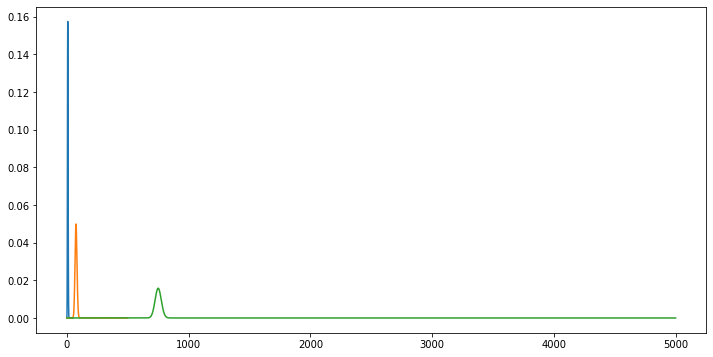

In [8]:
plt.figure(figsize=(12,6))
#50

data_binom1 = binom.pmf(k=range(50),n=50,p=0.15)
plt.plot(data_binom1)
#500

data_binom2 = binom.pmf(k=range(500),n=500,p=0.15)
plt.plot(data_binom2)
#5000

data_binom3 = binom.pmf(k=range(5000),n=5000,p=0.15)
plt.plot(data_binom3)

#### What did you notice from the distribution plots? Comment your findings.

In [9]:
#a mayor rango de muestreo la probabilidad de que suceda el evento es menor

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [10]:
# Your comment here


#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [15]:
# Your code here
poisson.pmf(320,300)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [14]:
# Your code here
poisson.pmf(60,300)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

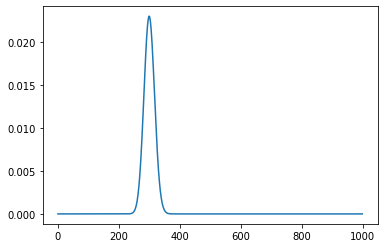

In [16]:
# your code here
n=range(1000)
plt.plot(poisson.pmf(n,300))